# Census income
## Budowa modeli

## 1. Importowanie danych

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

C:\Users\laura\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Skorzystamy z danych po pre-processingu wykonanego w pliku **01_EDA.ipynb**.

In [2]:
data = pd.read_csv ('census_income_dataset_processed.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,income_level,age,workclass,education_num,sex,capital_gain,capital_loss,hours_per_week,race_Black,race_White,race_other,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native_country_Mexico,native_country_United-States,native_country_other
0,0,39,6,13,1,2174.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,50,5,13,1,0.0,0.0,13.0,0,1,0,1,0,0,0,0,0,0,1,0
2,0,38,3,9,1,0.0,0.0,40.0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,53,3,7,1,0.0,0.0,40.0,1,0,0,1,0,0,0,0,0,0,1,0
4,0,28,3,13,0,0.0,0.0,40.0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,39,3,13,0,0.0,0.0,36.0,0,1,0,0,1,0,0,0,0,0,1,0
48838,0,64,3,9,1,0.0,0.0,40.0,1,0,0,0,0,1,0,0,0,0,1,0
48839,0,38,3,13,1,0.0,0.0,50.0,0,1,0,1,0,0,0,0,0,0,1,0
48840,0,44,3,13,1,5455.0,0.0,40.0,0,0,1,0,0,0,1,0,0,0,1,0


## 2. Podział danych

In [3]:
from sklearn.model_selection import train_test_split

y = data["income_level"]
X = data.drop("income_level", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=420, train_size=0.7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  random_state=420, train_size=0.7)

## 3. Tworzenie modeli

Przetestowaliśmy kilka modeli: 

##### SVC

In [4]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train).score(X_test, y_test)

0.8007234013512591

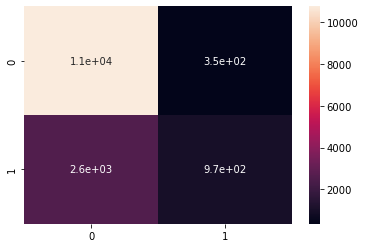

In [5]:
y_pred = clf.predict(X_test)
# y_pred

from sklearn import metrics

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train).score(X_test, y_test)

0.8415341568279533

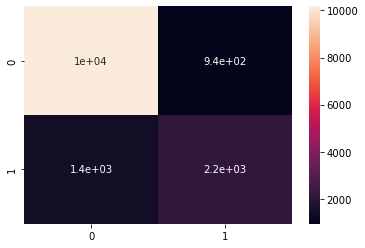

In [7]:
y_pred = rf.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### XGBoost

In [8]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", seed = 42, use_label_encoder=False)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8622807616187811

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


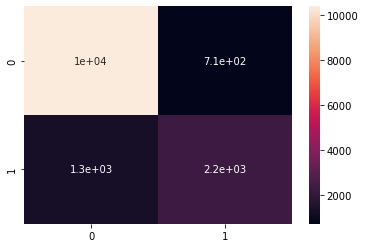

In [9]:
y_pred = xgb.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### Dummy Classifier

In [10]:
from sklearn.dummy import DummyClassifier
dc_model = DummyClassifier(strategy="most_frequent")
dc_model.fit(X_train, y_train).score(X_test, y_test)

0.7582065106121614

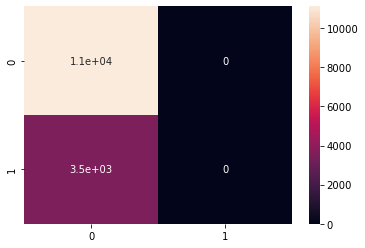

In [11]:
y_pred = dc_model.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

##### Logisitc Regression

In [12]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state=420,n_jobs=-1)
LR_model.fit(X_train, y_train).score(X_test, y_test)

0.8168975636388452

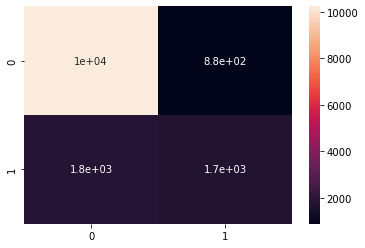

In [13]:
y_pred = LR_model.predict(X_test)

plt.figure()
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.show()

Spośród wybranych modeli na razie najlepiej wypadł XGBoost.

# Dogłębna analiza modeli i inżynieria cech

### Model bazowy, do którego będziemy się porównywać

In [14]:
xgb = XGBClassifier(objective="binary:logistic", seed = 42, use_label_encoder=False)
xgb.fit(X_train, y_train).score(X_test, y_test)

C:\Users\laura\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[14:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8622807616187811

### Wstępna inżynieria cech i modele

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

cat_features = ['age', 'workclass', 'education_num', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hours_per_week', 'native_country', 'Husband', 'Not-in-family', 
                'Other-relative', 'Own-child', 'Unmarried', 'Wife']

base_transformer = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features)        # one hot encoding
    ],
    remainder = "passthrough"
)


base_models = [("LR_model", LogisticRegression(random_state=420,n_jobs=-1)),
               ("SVM_model", SVC(random_state=42)),
               ("DT_model", DecisionTreeClassifier(random_state=420)),
               ("RF_model", RandomForestClassifier(random_state=420, n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=420, n_jobs=-1))]

kfolds = 8
split = KFold(n_splits=kfolds, shuffle=True, random_state=420)

base_results = []
names = []

for name, model in base_models:
    model_steps = Pipeline(
                           [('transformer', base_transformer),
                            ('model', model)]
                          )
    
    cv_results = cross_val_score(model_steps, 
                                 X_train, y_train,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

    base_results.append(cv_results)
    names.append(name)
    
    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) \t min: {min_score}, max: {max_score}")

C:\Users\laura\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 8.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\laura\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", li

LR_model cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan
SVM_model cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan
DT_model cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan
RF_model cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan
XGB_model cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan


Widzimy, że najlepiej poradziły sobie XGBoost oraz regresja logistyczna. Ze względu na szybkość trenowania się modeli, przy dalszej inżynierii cech będziemy sprawdzać, jak wprowadzane zmiany wpływają na skuteczność właśnie modelu regresji logistycznej. Na końcu sprawdzimy również, czy uda nam się w ten sposób poprawić działanie XGBoosta.

#### Skalowanie zmiennych

Wiedząc o tym, że modele regresji "nie lubią" nieprzeskalowanych danych, dokonamy teraz skalowania danych numerycznych. Wykorzystamy do tego standaryzację dla zmiennej wieku (przypomina ona bowiem - co naturalne - rozkład normalny) oraz normalizację min-max dla pozostałych cech, które nie mają takiej własności.

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

cat_features = ['age', 'workclass', 'education_num', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hours_per_week', 'native_country', 'Husband', 'Not-in-family', 
                'Other-relative', 'Own-child', 'Unmarried', 'Wife']


transformer = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features), 
    ("minmax_scaler", MinMaxScaler(), ["capital_gain", "capital_loss", "hours_per_week"]),
            #skalowanie
    ("std_scaler", StandardScaler(), ["age"])
    ],
    remainder = "passthrough"
)


lr = LogisticRegression(random_state=42, n_jobs=-1)

lr_model = Pipeline(
    [
        ('transformer', transformer),
        ('logistic-model', lr)
    ]
)

cv_results = cross_val_score(lr_model, 
                 X_train, y_train, 
                 cv=split,
                 scoring="accuracy",
                 n_jobs=-1)
    
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
    
print(f"LR_model with features scaling cross validation accuarcy score: {mean_score} +/- {std_dev} (std) \t min: {min_score}, max: {max_score}")

LR_model with features scaling cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan


`LR_model cross validation accuarcy score: 0.8593 +/- 0.0043 (std) 	 min: 0.8509, max: 0.8671`

Przeskalowanie zmiennych niewiele zmieniło wynik regresji logistycznej.

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

cat_features = ['age', 'workclass', 'education_num', 'race', 'sex', 'capital_gain', 
                'capital_loss', 'hours_per_week', 'native_country', 'Husband', 'Not-in-family', 
                'Other-relative', 'Own-child', 'Unmarried', 'Wife']


transformer = ColumnTransformer(
    [
    ("onehot", OneHotEncoder(handle_unknown = 'ignore'), cat_features), 
    ("std_scaler", StandardScaler(), ["age", "capital_gain", "capital_loss", "hours_per_week"])
    ],
    remainder = "passthrough"
)


lr = LogisticRegression(random_state=42, n_jobs=-1)

lr_model = Pipeline(
    [
        ('transformer', transformer),
        ('logistic-model', lr)
    ]
)

cv_results = cross_val_score(lr_model, 
                 X_train, y_train, 
                 cv=split,
                 scoring="accuracy",
                 n_jobs=-1)
    
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
    
print(f"LR_model with features scaling cross validation accuarcy score: {mean_score} +/- {std_dev} (std) \t min: {min_score}, max: {max_score}")

LR_model with features scaling cross validation accuarcy score: nan +/- nan (std) 	 min: nan, max: nan


`LR_model cross validation accuarcy score: 0.8593 +/- 0.0043 (std) 	 min: 0.8509, max: 0.8671`

Użycie standard scalera na wszystkich zmiennych dało nieco lepsze wyniki, ale znacznej róznicy nie ma.